In [19]:
from utils import *
from data_generators import text_to_training_data
import numpy as np
import matplotlib.pyplot as plt

In [13]:

def generate(net,start_idx,m,n_max,n_gen):
    
    #We will concatenate all generated integers (idx) in total_seq_idx
    total_seq_idx = start_idx

    n_total = total_seq_idx.shape[-1]
    slice = 0

    x_idx = start_idx

    while n_total < n_gen:
        n_idx = x_idx.shape[-1]
        X = onehot(x_idx,m)

        #probability distribution over m characters
        Z = net.forward(X)

        #selecting the last column of Z (distribution over final character)
        hat_Y = Z[0,:,-1]

        #sampling from the multinomial distribution
        #we do this instead of argmax to introduce some randomness
        #avoiding getting stuck in a loop
        y_idx = np.argwhere(np.random.multinomial(1, hat_Y.T)==1)

        if n_idx+1 > n_max:
            slice = 1

        #we add the new hat_y to the existing sequence
        #but we make sure that we only keep the last n_max elements
        x_idx = np.concatenate([x_idx[:,slice:],y_idx],axis=1)

        #we concatenate the new sequence to the total sequence
        total_seq_idx = np.concatenate([total_seq_idx,y_idx],axis=1)

        n_total = total_seq_idx.shape[-1]

    return total_seq_idx

In [14]:
d = 80
n_max = 50
p = 100
k = 25
L = 2

text =  open('input.txt', 'r').read()
data,idx_to_text,text_to_idx, m = text_to_training_data(n_max,text,num_batches=20,batch_size=50)


print("We will train on %d batches of size %d" % (len(data['x_train']),len(data['x_train'][0])))
print("Each sequence has length %d" % n_max)

print("Example of a sequence (chars): \n")
print(''.join([idx_to_text[i] for i in data['x_train'][0][0]]))

print("\nExample of a sequence (idx): \n")
print(data['x_train'][0][0])

data has 1115393 characters, 65 unique.
We will train on 20 batches of size 50
Each sequence has length 50
Example of a sequence (chars): 

First Citizen:
Before we proceed any further, hear

Example of a sequence (idx): 

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56]


In [15]:
from layers import *
from neural_network import NeuralNetwork

layers = [EmbedPosition(n_max, m, d), Attention(d, k), FeedForward(d, p), Attention(d, k), FeedForward(d, p),  LinearLayer(d, m), Softmax()]
net = NeuralNetwork(layers)
loss = CrossEntropy()

In [29]:
"""


Insert you code for training the neural network here


"""
x, y = data["x_train"], data["y_train"]
X, Y = batchmaker(np.array(x), m), batchmaker(np.array(y), m)
loss_arr = net.adams_algoritmen(loss, X, Y, 30, 10**-2)


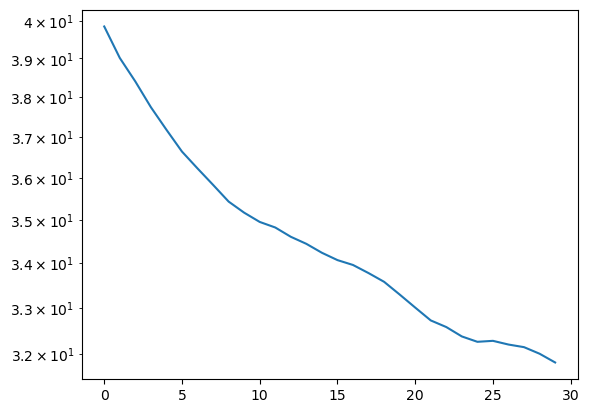

In [30]:
plt.semilogy(np.sum(loss_arr, axis=0))
plt.show()

In [24]:
#We can now generate text from an initial string
start_text = "Thou shall not"
start_idx = []
for e in start_text:
    start_idx.append(text_to_idx[e])
start_idx = np.array([start_idx])
print(start_idx)

[[32 46 53 59  1 57 46 39 50 50  1 52 53 58]]


In [31]:

#length of the total text sequence we want to generate
n_gen = 10*n_max

generated_idx = generate(net,start_idx,m,n_max,n_gen)
#print(generated_idx.shape)
test = ""
for e in generated_idx[0]:
    test += idx_to_text[e]
print(test)

Thou shall not beir: be fought nust
Andfecke min; they fro, you, a knowner,
I

MENINo So, Tidore has stay,
ent than the he me is prage thome ipfor a sa not spoorst so you lispeats howonswar affo thome
Aist mostne, thoush to go my fororust, whoundre wifoorm:
Thow thendsell forest? hat the good letspets in the inlove won proud a parttring hend will I  trepantst to bronendt,

MARCIUS:
I det are nablend in then win has a stitus hen him isporsts
Theateng there the lokes;--he
She lall nobrinder:
Gave 
